In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [58]:
# read in csv
raza_df = pd.read_csv('/Users/vinhtran/Downloads/3X_30V_100pts.csv', header = None, names = ['V Gate', 'V LI'])
vinh_df = pd.read_csv('/Users/vinhtran/Downloads/3A_40V_100pts.csv', header = None, names = ['V Gate', 'V LI'])

In [59]:
# extract data to numpy array 
raza = raza_df.to_numpy()
raza_gate = raza[:,0]
raza_lock_in = raza[:,1]

vinh = vinh_df.to_numpy()
vinh_gate = vinh[:,0]
vinh_lock_in = vinh[:,1]

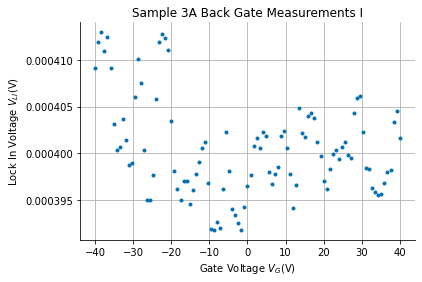

In [60]:
plt.plot(vinh_gate, vinh_lock_in, '.', color = '#0570b0')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3A Back Gate Measurements I")
plt.savefig('Vinh_Gate_Voltage.pdf', bbox_inches='tight')
#plt.show()

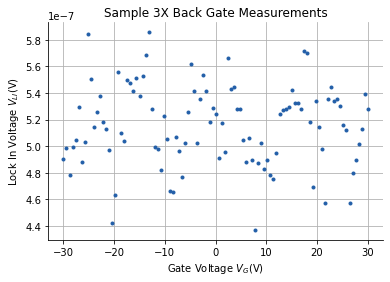

In [61]:
# Raza's Plot
plt.plot(raza_gate, raza_lock_in, '.', color = '#225ea8')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3X Back Gate Measurements")
plt.savefig('Raza_Gate_Voltage.pdf', bbox_inches='tight')
#plt.show()

In [4]:
# sample plots and data
df_70 = pd.read_csv('/Users/vinhtran/Downloads/70K.csv', header = None, names = ['V Gate', 'resistivity'])
df_300 = pd.read_csv('/Users/vinhtran/Downloads/300K.csv', header = None, names = ['V Gate', 'resistivity'])
df_5 = pd.read_csv('/Users/vinhtran/Downloads/5K.csv', header = None, names = ['V Gate', 'resistivity'])

temp_70K = df_70.to_numpy()
v_gate_70K = temp_70K[:,0]
resistivity_70K = temp_70K[:,1]

temp_300K = df_300.to_numpy()
v_gate_300K = temp_300K[:,0]
resistivity_300K = temp_300K[:,1]

temp_5K = df_5.to_numpy()
v_gate_5K = temp_5K[:,0]
resistivity_5K = temp_5K[:,1]

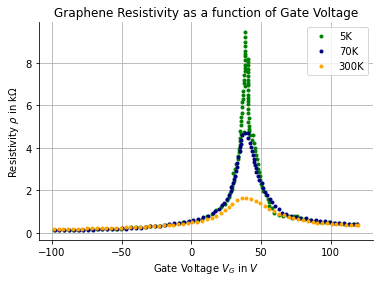

In [24]:
plt.plot(v_gate_5K, resistivity_5K, '.', color = 'green', label = '5K')
plt.plot(v_gate_70K, resistivity_70K, '.', color = 'navy', label = '70K')
plt.plot(v_gate_300K, resistivity_300K, '.', color = 'orange', label = '300K')

plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$ in $V$")
plt.ylabel(r'Resistivity $\rho$ in k$\Omega$')
plt.grid()
plt.title("Graphene Resistivity as a function of Gate Voltage")
plt.savefig('Graphene.pdf', bbox_inches='tight')
#plt.show()

In [2]:
vinh_40 = pd.read_csv('/Users/vinhtran/Downloads/Vinh_40V_One.csv', header = None, names = ['V Gate', 'V LI'])
vinh_40_after = pd.read_csv('/Users/vinhtran/Downloads/Vinh_40V_After.csv', header = None, names = ['V Gate', 'V LI'])

vinh_40_one = vinh_40.to_numpy()
vinh_40_gate = vinh_40_one[:,0]
vinh_40_lock_in = vinh_40_one[:,1]

vinh_after = vinh_40_after.to_numpy()
vinh_after_gate = vinh_after[:,0]
vinh_after_lock_in = vinh_after[:,1]

In [3]:
def gaussian(x, a, b, c, d):
    return a*np.exp(-(x-b)**2/(2*c**2))+d;

popt, pcov = curve_fit(gaussian, vinh_after_gate, vinh_after_lock_in)

def lorentzian(x, x0, a, gam, d):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2) + d

popt_lorentz, pcov_lorentz = curve_fit(lorentzian, vinh_after_gate, vinh_after_lock_in)

popt_lorentz_2, pcov_loretz_2 = curve_fit(lorentzian, vinh_40_gate, vinh_40_lock_in)

In [22]:
popt

array([3.22203242e-08, 8.93649717e+00, 1.15942305e+01, 4.84501478e-06])

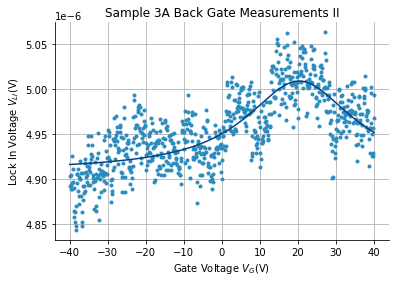

In [4]:
plt.plot(vinh_40_gate, vinh_40_lock_in, '.', color = '#2b8cbe')
plt.plot(vinh_after_gate, lorentzian(vinh_40_gate, *popt_lorentz_2), color = '#084081')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3A Back Gate Measurements II")
plt.savefig('Vinh_40_Gate_Voltage.pdf', bbox_inches='tight')
#plt.show()

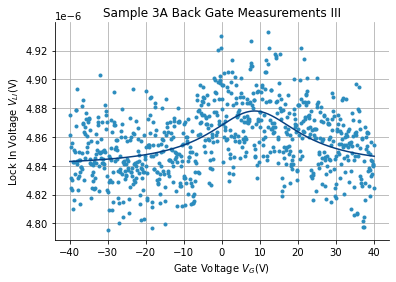

In [5]:
plt.plot(vinh_after_gate, vinh_after_lock_in, '.', color = '#2b8cbe')
plt.plot(vinh_after_gate, lorentzian(vinh_after_gate, *popt_lorentz), color = '#084081')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3A Back Gate Measurements III")
plt.savefig('Vinh_after_Gate_Voltage.pdf', bbox_inches='tight')
#plt.show()